# Context:
    
The dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, 
each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to 
the set of attributes. The link to the dataset can be found below.

# Dataset:
https://www.kaggle.com/renaldydermawan25/credit-data/version/1

# Some Attribute information:
    
Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

# Objective:
    
To Guage Feature Importance

In [22]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Read input file and understand the data
# "default" is my dependent variable
df_pre = pd.read_csv("credit_data.csv")

In [4]:
df_pre.shape

(1000, 21)

In [5]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [6]:
df_pre.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not at this bank),domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not at this bank),(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


In [7]:
df_pre.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

# Distribution of Target Feature

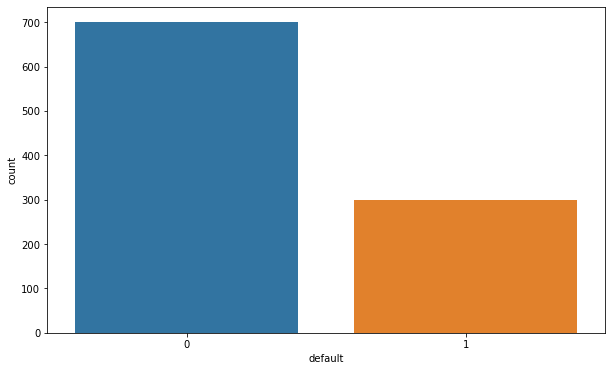

In [8]:
plt.figure(figsize = (10,6))
sns.countplot(x = df_pre['default']);

In [9]:
df_pre['default'].value_counts(dropna = False)

0    700
1    300
Name: default, dtype: int64

# Numerical Data Analysis

In [10]:
num_cols = df_pre.select_dtypes(include = np.number).columns.tolist()
num_data = df_pre[num_cols]
num_data.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,0,6,1169,4,4,67,2,1
1,1,48,5951,2,2,22,1,1
2,0,12,2096,2,3,49,1,2
3,0,42,7882,2,4,45,1,2
4,1,24,4870,3,4,53,2,2


In [74]:
df_pre['people_under_maintenance'].value_counts()

1    845
2    155
Name: people_under_maintenance, dtype: int64

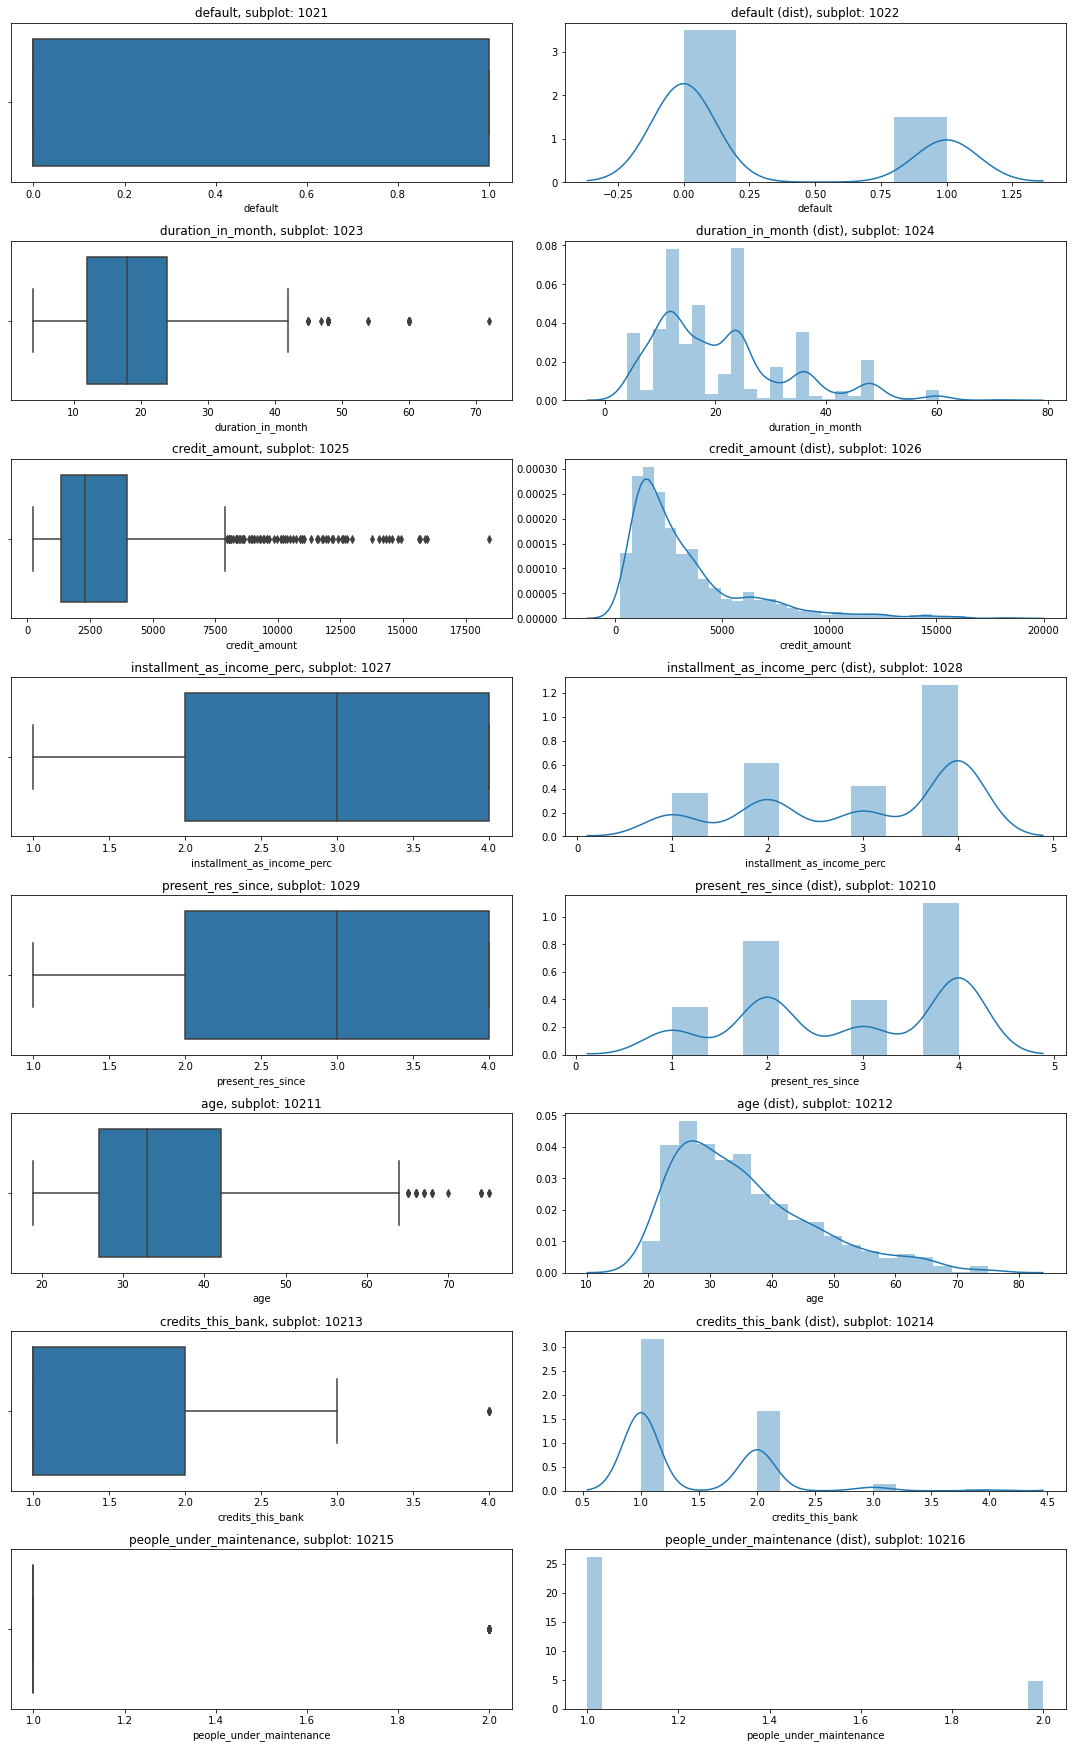

In [11]:
a = 10  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30,20))
fig.set_size_inches(15, 30)

for i in num_cols:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(num_data[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(num_data[i])
    c = c + 1

plt.tight_layout()
plt.show();

# Categorical Data Analysis

In [12]:
cal_cols = df_pre.select_dtypes(exclude = np.number).columns.tolist()
cat_data = df_pre[cal_cols]
cat_data.head()

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,< 0 DM,critical account/ other credits existing (not at this bank),domestic appliances,unknown/ no savings account,.. >= 7 years,male : single,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee / official,none,yes
2,no checking account,critical account/ other credits existing (not at this bank),(vacation - does not exist?),... < 100 DM,4 <= ... < 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
3,< 0 DM,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,male : single,guarantor,if not A121 : building society savings agreement/ life insurance,none,for free,skilled employee / official,none,yes
4,< 0 DM,delay in paying off in the past,car (new),... < 100 DM,1 <= ... < 4 years,male : single,none,unknown / no property,none,for free,skilled employee / official,none,yes


In [13]:
def value_counts_fun(df):
    for i in df.columns:
        print('\n',i, '\n', df[i].value_counts())

In [14]:
value_counts_fun(cat_data)


 account_check_status 
 no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year    63 
Name: account_check_status, dtype: int64

 credit_history 
 existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                88 
all credits at this bank paid back duly                        49 
no credits taken/ all credits paid back duly                   40 
Name: credit_history, dtype: int64

 purpose 
 domestic appliances             280
car (new)                       234
radio/television                181
car (used)                      103
business                        97 
(vacation - does not exist?)    50 
education                       22 
repairs                         12 
furniture/equ

In [16]:
cat_data_final = pd.get_dummies(cat_data,drop_first=True)
cat_data_final.head()

,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_business,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/television,purpose_repairs,purpose_retraining,savings_... < 100 DM,savings_100 <= ... < 500 DM,savings_500 <= ... < 1000 DM,savings_unknown/ no savings account,present_emp_since_... < 1 year,present_emp_since_1 <= ... < 4 years,present_emp_since_4 <= ... < 7 years,present_emp_since_unemployed,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed,personal_status_sex_male : single,other_debtors_guarantor,other_debtors_none,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1
3,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1


# Final Data for Logistic Regression

In [17]:
data_prep_final = pd.concat([num_data,cat_data_final],axis=1)
data_prep_final.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_business,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/television,purpose_repairs,purpose_retraining,savings_... < 100 DM,savings_100 <= ... < 500 DM,savings_500 <= ... < 1000 DM,savings_unknown/ no savings account,present_emp_since_... < 1 year,present_emp_since_1 <= ... < 4 years,present_emp_since_4 <= ... < 7 years,present_emp_since_unemployed,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed,personal_status_sex_male : single,other_debtors_guarantor,other_debtors_none,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,6,1169,4,4,67,2,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1
1,1,48,5951,2,2,22,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1
3,0,42,7882,2,4,45,1,2,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,1,24,4870,3,4,53,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1


In [18]:
data_prep_final.columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs', 'purpose_retraining', 'savings_... < 100 DM',
       'savings_100 <= ... < 500 DM', 'savings_500 <= ... < 1000 DM ',
       'savings_unknown/ no savings 

In [24]:
# Copy all the predictor variables into X dataframe
X = data_prep_final.drop('default', axis=1)

# Copy target into the y dataframe. 
y = data_prep_final.pop('default')

In [25]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify=y)

In [26]:
y_train.value_counts(1)

0    0.7
1    0.3
Name: default, dtype: float64

In [27]:
y_test.value_counts(1)

0    0.7
1    0.3
Name: default, dtype: float64

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# %%time
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [31]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.951114,0.048886
1,0.075509,0.924491
2,0.494756,0.505244
3,0.646041,0.353959
4,0.837491,0.162509


In [32]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.7614285714285715

In [33]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

AUC: 0.810


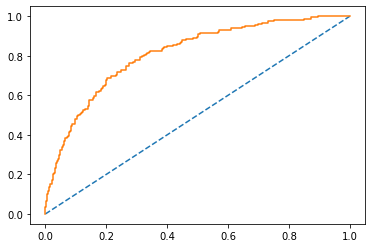

In [34]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.810


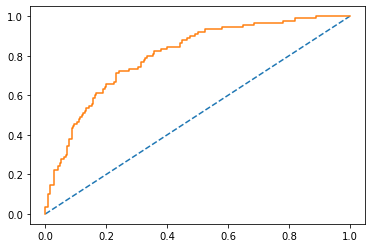

In [35]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for test data

In [36]:
confusion_matrix(y_test, ytest_predict)

array([[179,  31],
       [ 41,  49]], dtype=int64)

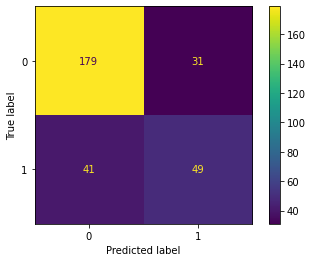

In [37]:
plot_confusion_matrix(model,X_test,y_test);

In [38]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       210
           1       0.61      0.54      0.58        90

    accuracy                           0.76       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.75      0.76      0.76       300



# Ensemble RandomForest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

## Label Encoding for RF

In [42]:
for feature in cat_data.columns:
    if cat_data[feature].dtype =='object':
        cat_data[feature] = pd.Categorical(cat_data[feature]).codes

In [43]:
cat_data.head()

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,1,1,4,4,0,3,2,2,1,1,1,1,1
1,0,3,4,1,2,0,2,2,1,1,1,0,1
2,3,1,0,1,3,3,2,2,1,1,3,0,1
3,1,3,7,1,3,3,1,0,1,0,1,0,1
4,1,2,2,1,2,3,2,3,1,0,1,0,1


In [44]:
final_data_prep = pd.concat([num_data,cat_data],axis=1)
final_data_prep.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,0,6,1169,4,4,67,2,1,1,1,4,4,0,3,2,2,1,1,1,1,1
1,1,48,5951,2,2,22,1,1,0,3,4,1,2,0,2,2,1,1,1,0,1
2,0,12,2096,2,3,49,1,2,3,1,0,1,3,3,2,2,1,1,3,0,1
3,0,42,7882,2,4,45,1,2,1,3,7,1,3,3,1,0,1,0,1,0,1
4,1,24,4870,3,4,53,2,2,1,2,2,1,2,3,2,3,1,0,1,0,1


In [45]:
# Copy all the predictor variables into X dataframe
X = final_data_prep.drop('default', axis=1)

# Copy target into the y dataframe. 
y = final_data_prep.pop('default')

In [46]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [47]:
y_train.value_counts(1)

0    0.7
1    0.3
Name: default, dtype: float64

In [48]:
y_test.value_counts(1)

0    0.7
1    0.3
Name: default, dtype: float64

In [49]:
#Let us time every cell
import time

In [50]:
rfc1 = RandomForestClassifier(n_estimators=100,max_features = 6,random_state=1)
rfc1

RandomForestClassifier(max_features=6, random_state=1)

In [51]:
start = time.time()

rfc1.fit(X_train,y_train)

end = time.time()
print("Total Time taken is ",(end - start), "seconds")

RandomForestClassifier(max_features=6, random_state=1)

Total Time taken is  0.2958352565765381 seconds


In [52]:
start = time.time()

ytrain_predict = rfc1.predict(X_train)
ytest_predict = rfc1.predict(X_test)

end = time.time()
print("Total Time taken is",(end - start),"seconds")

Total Time taken is 0.03160572052001953 seconds


## Train Accuracy

In [53]:
start = time.time()

print(rfc1.score(X_train,y_train))

end = time.time()
print("Total Time taken is",(end - start),"seconds")

1.0
Total Time taken is 0.017999887466430664 seconds


### Evaluating model performance with confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix

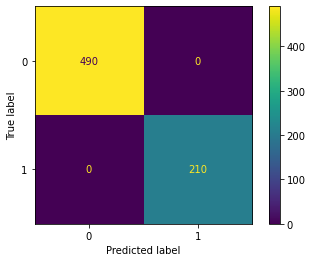

In [55]:
# Let us check how well our model is predicting 1's and 0's 
plot_confusion_matrix(rfc1,X_train,y_train)
plt.show();

Model is doing really good job in predicting 1's and 0's on training data

In [56]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00       210

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



Precision and Recall rate is also 100%

## Test Accuracy

In [57]:
rfc1.score(X_test,y_test)

0.7233333333333334

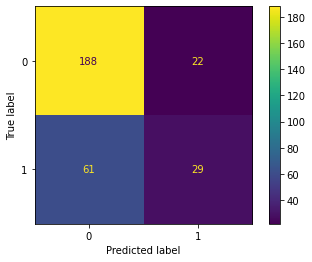

In [58]:
plot_confusion_matrix(rfc1,X_test,y_test)

In [59]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       210
           1       0.57      0.32      0.41        90

    accuracy                           0.72       300
   macro avg       0.66      0.61      0.62       300
weighted avg       0.70      0.72      0.70       300



We can clearly see here that model is doing well on the training data but doing poorly on test data a perfect scenario of overfitting here in our base model. Let us move to other techniques to handle overfitting 

AUC is coming better than accuracy in test dataset - Overall its a good model. Let us try to tune our model with hyperparameters to remove overfitting scenario

## RandomizedSearchCV

In [60]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [61]:
n_estimators = [100,200,300]
max_depth = [3,4,5]
min_samples_split = [2,5,10]

In [62]:
param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split':min_samples_split
    }
print(param_grid)

{'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10]}


In [63]:
start = time.time()

rfc_randomized = RandomizedSearchCV(estimator = rfc1,
                                    param_distributions=param_grid,
                                    cv=5,
                                   verbose=True,
                                   n_jobs=4)

rfc_randomized.fit(X_train,y_train)

end = time.time()
print("Total Time taken is",(end - start),"seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   12.4s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_features=6,
                                                    random_state=1),
                   n_jobs=4,
                   param_distributions={'max_depth': [3, 4, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=True)

Total Time taken is 12.814180374145508 seconds


In [64]:
rfc_randomized.best_estimator_

RandomForestClassifier(max_depth=5, max_features=6, min_samples_split=10,
                       random_state=1)

## Train Accuracy

In [65]:
rfc_randomized.score(X_train,y_train)

0.8057142857142857

In [66]:
rfc_randomized.score(X_test,y_test)

0.7366666666666667

In [67]:
best_grid = rfc_randomized.best_estimator_

In [68]:
ytrain_predict_rscv = best_grid.predict(X_train)
ytest_predict_rscv = best_grid.predict(X_test)

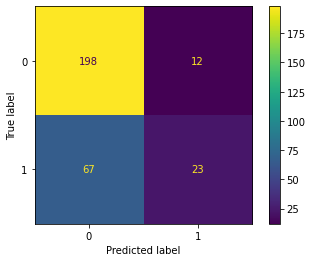

In [69]:
plot_confusion_matrix(best_grid,X_test,y_test)

In [70]:
print(classification_report(y_test,ytest_predict_rscv))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       210
           1       0.66      0.26      0.37        90

    accuracy                           0.74       300
   macro avg       0.70      0.60      0.60       300
weighted avg       0.72      0.74      0.69       300

